11490434/11490434 [==============================] - 0s 0us/step
Epoch 0, Loss: 2.3016257293318723, Accuracy: 0.11236666666666667
Epoch 100, Loss: 2.282370413574245, Accuracy: 0.11306666666666666
Epoch 200, Loss: 2.133786710886112, Accuracy: 0.36656666666666665
Epoch 300, Loss: 1.6736854882605139, Accuracy: 0.55895
Epoch 400, Loss: 1.246369045167902, Accuracy: 0.6857833333333333
Epoch 500, Loss: 0.9788800961241085, Accuracy: 0.7600333333333333
Epoch 600, Loss: 0.8093288575192734, Accuracy: 0.80215
Epoch 700, Loss: 0.6973533414823075, Accuracy: 0.8277333333333333
Epoch 800, Loss: 0.6202772184460775, Accuracy: 0.8447166666666667
Epoch 900, Loss: 0.5643193897901955, Accuracy: 0.8580666666666666
Test Loss: 0.5054518149260228, Test Accuracy: 0.8728


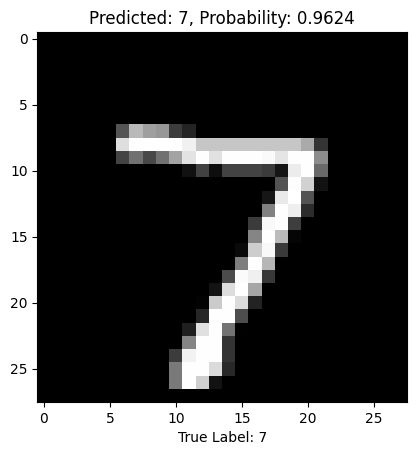

Probability scores: [[1.07204379e-03 1.64591157e-04 4.31646551e-04 4.28512234e-03
  7.70490736e-04 2.37221704e-03 1.03848981e-05 9.62363582e-01
  6.85337658e-04 2.78445838e-02]]
Max probability: 0.9623635820329752
Predicted digit: 7


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = - np.log(y_pred[np.arange(n_samples), y_true.argmax(axis=1)])
    loss = np.sum(logp) / n_samples
    return loss

def compute_accuracy(y_true, y_pred):
    accuracy = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1)) / y_true.shape[0]
    return accuracy

# Neural Network parameters
input_size = 28 * 28
hidden_size = 64
output_size = 10
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Training the network
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(x_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    # Compute loss
    loss = cross_entropy_loss(y_train, a2)

    # Backward pass
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / x_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / x_train.shape[0]

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(x_train.T, dz1) / x_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / x_train.shape[0]

    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print loss and accuracy
    if epoch % 100 == 0:
        train_loss = loss
        train_accuracy = compute_accuracy(y_train, a2)
        print(f"Epoch {epoch}, Loss: {train_loss}, Accuracy: {train_accuracy}")

# Evaluate on the test set
z1_test = np.dot(x_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = softmax(z2_test)

test_loss = cross_entropy_loss(y_test, a2_test)
test_accuracy = compute_accuracy(y_test, a2_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Function to display image and prediction details
def display_prediction(image, prediction, true_label=None):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(prediction)}, Probability: {np.max(prediction):.4f}')
    if true_label is not None:
        plt.xlabel(f'True Label: {true_label}')
    plt.show()
    print("Probability scores:", prediction)
    print("Max probability:", np.max(prediction))
    print("Predicted digit:", np.argmax(prediction))

index = 0  # Change the index to test with different images
single_image = x_test[index]
single_image_prediction = softmax(np.dot(sigmoid(np.dot(single_image, W1) + b1), W2) + b2)

display_prediction(x_test[index], single_image_prediction, np.argmax(y_test[index]))


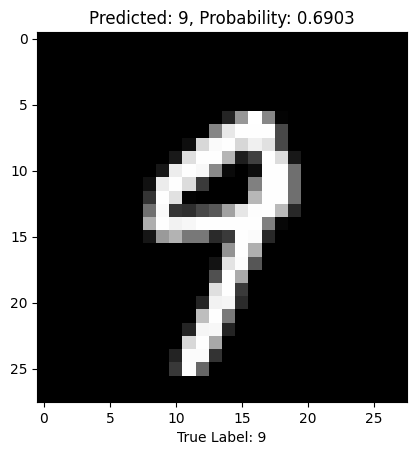

Probability scores: [[2.86825689e-04 1.39774720e-03 3.05014854e-04 2.44368190e-03
  1.17391423e-01 2.06894665e-02 9.15772350e-04 1.48147698e-01
  1.81253914e-02 6.90296980e-01]]
Max probability: 0.6902969800041447
Predicted digit: 9


In [16]:
import random

index = random.randint(0,9999)
single_image = x_test[index]
single_image_prediction = softmax(np.dot(sigmoid(np.dot(single_image, W1) + b1), W2) + b2)

display_prediction(x_test[index], single_image_prediction, np.argmax(y_test[index]))
